In [19]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sea

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [4]:
#question 1

#a

students = {
    'x': [95, 85, 80, 70, 60],
    'y': [85, 95, 70, 65, 70]
}

s = pd.DataFrame(students)
s.describe()

,x,y
count,5.000000,5.0000
mean,78.000000,77.0000
std,13.509256,12.5499
min,60.000000,65.0000
25%,70.000000,70.0000
50%,80.000000,70.0000
75%,85.000000,85.0000
max,95.000000,95.0000


In [6]:
x = s.x.values.reshape(-1, 1)
y = s.y.values.reshape(-1, 1)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=0)

regression = LinearRegression()
regression.fit(xTrain, yTrain)
print(regression.predict(x))

[[90.51724138]
 [83.79310345]
 [80.43103448]
 [73.70689655]
 [66.98275862]]


In [9]:
print(f"if the grade print(for a student with an 80 on the test should come out to: {regression.predict([[80]])}")

if the grade print(for a student with an 80 on the test should come out to: [[80.43103448]]


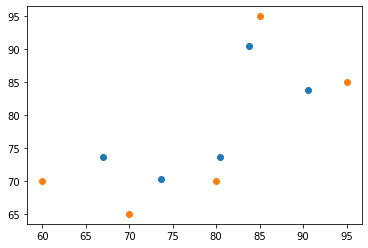

In [12]:
print(plt.scatter(regression.predict(x), y=regression.predict(y)), "\n")
print(plt.scatter(x=s.x, y=s.y))



In [11]:
print('Values are close to what was predicted, but are not a match')

Values are close to what was predicted, but are not a match


In [13]:
#d
print("The our machine could have done better with more data to learn from.")

The our machine could have done better with more data to learn from.


In [25]:
#Question 2

#a
data=pd.read_csv( "zillow.csv")

data.describe()

,Index,"""Living Space (sq ft)""","""Beds""","""Baths""","""Zip""","""Year""","""List Price ($)"""
count,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,10.50000,2645.650000,3.850000,3.17500,32308.900000,1992.650000,383440.000000
std,5.91608,1111.423614,0.988087,1.18405,3.552612,18.530984,205756.671312
min,1.00000,1128.000000,2.000000,1.00000,32301.000000,1954.000000,89000.000000
25%,5.75000,1904.750000,3.000000,2.00000,32308.750000,1987.750000,233750.000000
50%,10.50000,2490.000000,4.000000,3.00000,32309.500000,1995.000000,340000.000000
75%,15.25000,3577.750000,4.250000,4.00000,32312.000000,2006.000000,554675.000000
max,20.00000,4892.000000,6.000000,6.00000,32312.000000,2016.000000,799900.000000


In [21]:
#b
x=data[' "List Price ($)"']

y=data[' "Living Space (sq ft)"']

print("The correlation between List price vs Living space: " +str(x.corr(y)))


x=data[' "List Price ($)"']

y=data[' "Beds"']

print("The correlation between List price vs Beds: "+str(x.corr(y)))

Correlation between List price vs Living space: 0.82089889927515
Correlation between List price vs Beds: 0.5884637029711128


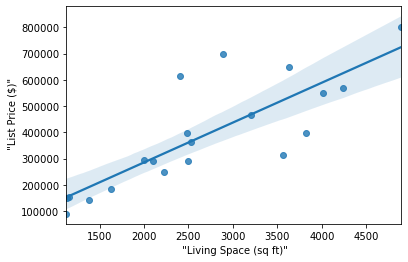

In [30]:
#c
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

sns.regplot(x=' "Living Space (sq ft)"', y=' "List Price ($)"', data=data);




In [31]:
#d 
import numpy as np

from sklearn.linear_model import LinearRegression

#x=

x = np.array(data[' "Living Space (sq ft)"']).reshape((-1, 1))

y=data[' "List Price ($)"']

model = LinearRegression()

model.fit(x, y)

# evaluate model performance using R2 value - Q h

r_sq = model.score(x, y)

print('coefficient of determination:', r_sq)




coefficient of determination: 0.6738750028311529


In [32]:
#e
print('Predicted values for 1800: ', model.predict([[1800]]))

print('Predicted values for 2500: ', model.predict([[2500]]))

# statmodel

import statsmodels.api as sm


results = sm.OLS(y,x).fit()


results.summary()

print('R2: ', results.rsquared)

print('Predicted values for 1800: ', results.predict([1800]))

print('Predicted values for 2500: ', results.predict([2500]))




Predicted values for 1800:  [254924.75987295]
Predicted values for 2500:  [361305.25782001]
R2:  0.9296845448114558
Predicted values for 1800:  [262697.50227985]
Predicted values for 2500:  [364857.64205535]


In [26]:
#f
x = data[[' "Living Space (sq ft)"',' "Beds"']]

y=data[' "List Price ($)"']

model = LinearRegression()

model.fit(x, y)


r_sq = model.score(x, y)

print('coefficient of determination:', r_sq)

coefficient of determination: 0.6864409987008632


In [27]:
#g
print('Predicted values for 2200, 3: ', model.predict([[2200,3]]))

#Variable to model

results = sm.OLS(y,x).fit()

#Model summary

results.summary()

Predicted values for 2200, 3:  [336420.35568863]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       "List Price ($)"   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              122.7
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                    3.24e-11
Time:                        22:01:45   Log-Likelihood:                         -261.10
No. Observations:                  20   AIC:                                      526.2
Df Residuals:                      18   BIC:                                      528.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
 "Living Space (sq ft)"   173.5552     39.159      4.432      0.000      91.286     255.825
 "Beds"                 -2.048e+04   2.82e+04     -0.726      0.477   -7.97e+04    3.88e+04
==============================================================================
Omnibus:                        7.441   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                4.820
Skew:                           1.049   Prob(JB):                       0.0898
Kurtosis:                       4.175   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""